# Regression Predict Student Solution

© Explore Data Science Academy

---

### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.

On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>


<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---


In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt #
from statsmodels.graphics.correlation import plot_corr
import seaborn as sns 
import random
from IPython.display import display, Image
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_predict
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>

## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡                                                          |
| :------------------------------------------------------------------------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---


In [203]:
df = pd.read_csv('./df_train.csv') #Load the train CSV file into a pandas DataFrame

In [204]:
test_df = pd.read_csv('./df_test.csv')

In [205]:
df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,1.000000,level_6,0.0,2.666667,89.000000,95.666667,56.666667,4.333333,...,280.816667,281.276667,285.150000,287.573333,280.483333,290.150000,284.816667,279.686667,278.483333,-28.333333
8759,8759,2017-12-31 12:00:00,5.000000,level_6,0.0,2.000000,82.000000,85.000000,26.666667,8.000000,...,283.483333,287.483333,286.483333,288.616667,287.150000,291.150000,287.150000,282.400000,280.150000,2266.666667
8760,8760,2017-12-31 15:00:00,6.333333,level_9,0.4,7.333333,67.666667,71.000000,63.333333,8.333333,...,285.150000,289.816667,283.816667,285.330000,289.150000,286.816667,289.150000,283.956667,281.150000,822.000000
8761,8761,2017-12-31 18:00:00,7.333333,level_8,0.2,7.333333,67.666667,79.000000,63.333333,2.666667,...,283.483333,287.523333,278.816667,281.410000,286.816667,284.150000,289.150000,282.666667,280.816667,-760.000000


In [206]:
test_df

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,...,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,...,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,...,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,...,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,...,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000


### Exploring the training dataset


In [207]:
#look at data statistics
df.shape

(8763, 49)

We know that the train dataframe has 8763 rows and 49 coloumns


In [208]:
df.describe() 

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


### Summary Statistics:

- **Count**: The number of non-null values for each column.
- **Mean**: The average value of each column.
- **Std**: The standard deviation, a measure of the amount of variation or dispersion, for each column.
- **Min**: The minimum value in each column.
- **25%**: The 25th percentile or the first quartile.
- **50% (Median)**: The median or the 50th percentile.
- **75%**: The 75th percentile or the third quartile.
- **Max**: The maximum value in each column.


In [209]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

#The info command confirms our categorical and numerical features. outputs the number of non-null entries in each column.
#As such, we can be certain that our data has missing values if columns have a varying number of non-null entries.


time, Valencia_wind_deg, and Seville are object types, hence, are non-numeric which may have to be changed in data engineering section.


In [210]:
df.isnull().sum() #provide the total number of null values appearing in each feature. basically opposite of df.info

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

#provide the total number of null values appearing in each feature. basically opposite of df.info. We can see here that Valencia_pressure is the only feature with null values - 2068 null values. We will look into fixing this in the data cleaning and engineering section.


In [211]:
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

Entries with high negative skew are: Valencia_pressure, Madrid_pressure, (and Bilbao_weather_id, Madrid_weather_id and Barcelona_weather_id). Those with high positive skew are: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_snow_3h, Seville_rain_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h)


In [212]:
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with high kurtosis i.e. >3, implying a large number of outliers are: Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, (Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, are IDs relevant in distribution study)

Entries with high skewness often correspond with values with high kurtosis indicating non-normally distributed. These entries could either be replaced or dropped in data engineering section or adjusted using rescaling (StandardScaler)


<a id="four"></a>

## 4. Data Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Data engineering ⚡                                                                                        |
| :------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---


### Data Preprocessing


### remove missing values/ features

##### for each change to the df (train) there are identical changes to the test_df underneath to ensure that test_df and df are identicle for the modelling section


In [213]:
# Calculate the percentage of null values in the 'Valencia_pressure' column
null_percentage = df['Valencia_pressure'].isna().mean() * 100
print("Percentage of Null Values in Valencia_pressure:", null_percentage)

Percentage of Null Values in Valencia_pressure: 23.59922401004222


Mean: You should consider using the mean (average) to replace null values when your data is approximately normally distributed. This means that the data is symmetric and bell-shaped. The mean can be sensitive to extreme outliers, so if your data has significant outliers, it might not be the best choice.

Median: The median is a robust statistic that is less affected by extreme values or outliers. You should consider using the median to replace null values when your data is skewed or has outliers. If your data has a non-normal distribution, the median can be a more representative measure of central tendency.


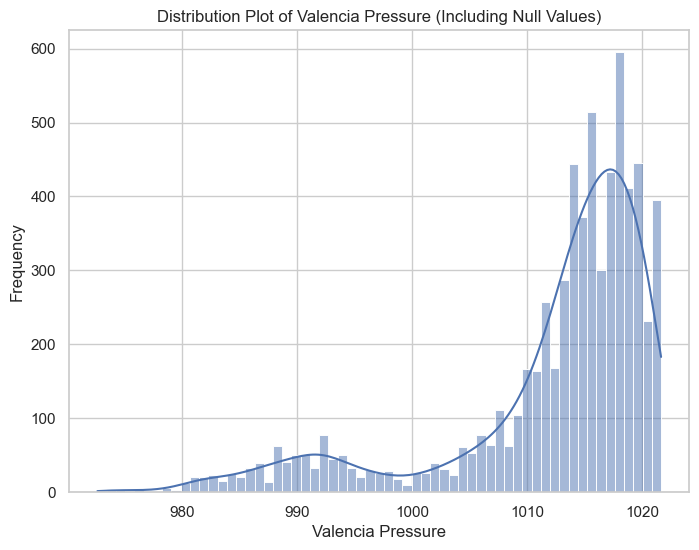

Skewness of 'Valencia_pressure': -1.7051619012336132


In [214]:
# Filter the column of interest
feature_data = df['Valencia_pressure']

# Create a distribution plot using Seaborn
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.histplot(feature_data, kde=True)  # Create a histogram with a kernel density estimate
plt.title("Distribution Plot of Valencia Pressure (Including Null Values)")
plt.xlabel("Valencia Pressure")
plt.ylabel("Frequency")
plt.show()

skewness = df['Valencia_pressure'].skew()

print(f"Skewness of 'Valencia_pressure': {skewness}")

Impute Null Values with Median:

Since the distribution is left-skewed, the median is a robust measure of central tendency and is less affected by outliers. We will impute the null values with the median of the "valencia_pressure" column.


#### Replace nulls


In [215]:
# Calculate the median of the 'Valencia_pressure' column
median_valencia_pressure = df['Valencia_pressure'].median()

In [216]:
# Replace null values with the median
df['Valencia_pressure'].fillna(median_valencia_pressure, inplace=True)

#### Fix dtypes


We needed to fix the datatypes of certain features so that they could be used in the models.


In [217]:
# Convert 'time' to datetime type
df['time'] = pd.to_datetime(df['time'])
# Convert 'time' to Unix time so it can be used in ML as a numerical feature 
df['time_unix'] = (df['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [218]:
# Extract only the last number from values and change the column to a numeric type
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)', expand=False).astype(float)


In [219]:
df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)', expand=False).astype(float)

In [220]:
#SANITY CHECK
print(df.dtypes)

Unnamed: 0                       int64
time                    datetime64[ns]
Madrid_wind_speed              float64
Valencia_wind_deg              float64
Bilbao_rain_1h                 float64
Valencia_wind_speed            float64
Seville_humidity               float64
Madrid_humidity                float64
Bilbao_clouds_all              float64
Bilbao_wind_speed              float64
Seville_clouds_all             float64
Bilbao_wind_deg                float64
Barcelona_wind_speed           float64
Barcelona_wind_deg             float64
Madrid_clouds_all              float64
Seville_wind_speed             float64
Barcelona_rain_1h              float64
Seville_pressure               float64
Seville_rain_1h                float64
Bilbao_snow_3h                 float64
Barcelona_pressure             float64
Seville_rain_3h                float64
Madrid_rain_1h                 float64
Barcelona_rain_3h              float64
Valencia_snow_3h               float64
Madrid_weather_id        

### Feature Engineering


Let us create some new features that coudl help improve our model, or to be used during EDA


In [221]:

#create temp range for each city using temp max and min 
df['Madrid_temp_range'] = df['Madrid_temp_max'] - df['Madrid_temp_min']
df['Valencia_temp_range'] = df['Valencia_temp_max'] - df['Valencia_temp_min']
df['Seville_temp_range'] = df['Seville_temp_max'] - df['Seville_temp_min']
df['Bilbao_temp_range'] = df['Bilbao_temp_max'] - df['Bilbao_temp_min']
df['Barcelona_temp_range'] = df['Barcelona_temp_max'] - df['Barcelona_temp_min']


In [222]:
# Extract year, month, day, and hour as separate features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

In [223]:
# Map the months to the corresponding seasons
season_mapping = {
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall',
    12: 'Winter'
}

# Create a new 'season' column based on the mapping
df['season'] = df['month'].map(season_mapping)

# Now, the DataFrame has a 'season' feature that corresponds to the season based on the 'month' feature.


In [224]:
# Create a new DataFrame with one-hot encoding for the 'season' column
season_dummies = pd.get_dummies(df['season'], prefix='season')

# Concatenate the one-hot encoded season columns to the original DataFrame
df = pd.concat([df, season_dummies], axis=1)

In [225]:
#SANITY CHECK
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 64 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            8763 non-null   int64         
 1   time                  8763 non-null   datetime64[ns]
 2   Madrid_wind_speed     8763 non-null   float64       
 3   Valencia_wind_deg     8763 non-null   float64       
 4   Bilbao_rain_1h        8763 non-null   float64       
 5   Valencia_wind_speed   8763 non-null   float64       
 6   Seville_humidity      8763 non-null   float64       
 7   Madrid_humidity       8763 non-null   float64       
 8   Bilbao_clouds_all     8763 non-null   float64       
 9   Bilbao_wind_speed     8763 non-null   float64       
 10  Seville_clouds_all    8763 non-null   float64       
 11  Bilbao_wind_deg       8763 non-null   float64       
 12  Barcelona_wind_speed  8763 non-null   float64       
 13  Barcelona_wind_deg

<a id="three"></a>

## 3. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡                                                             |
| :------------------------------------------------------------------------------------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [226]:
column_names = df.columns
print(column_names)

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

### Evaluate Feature Relationship


#### Correlation Analysis


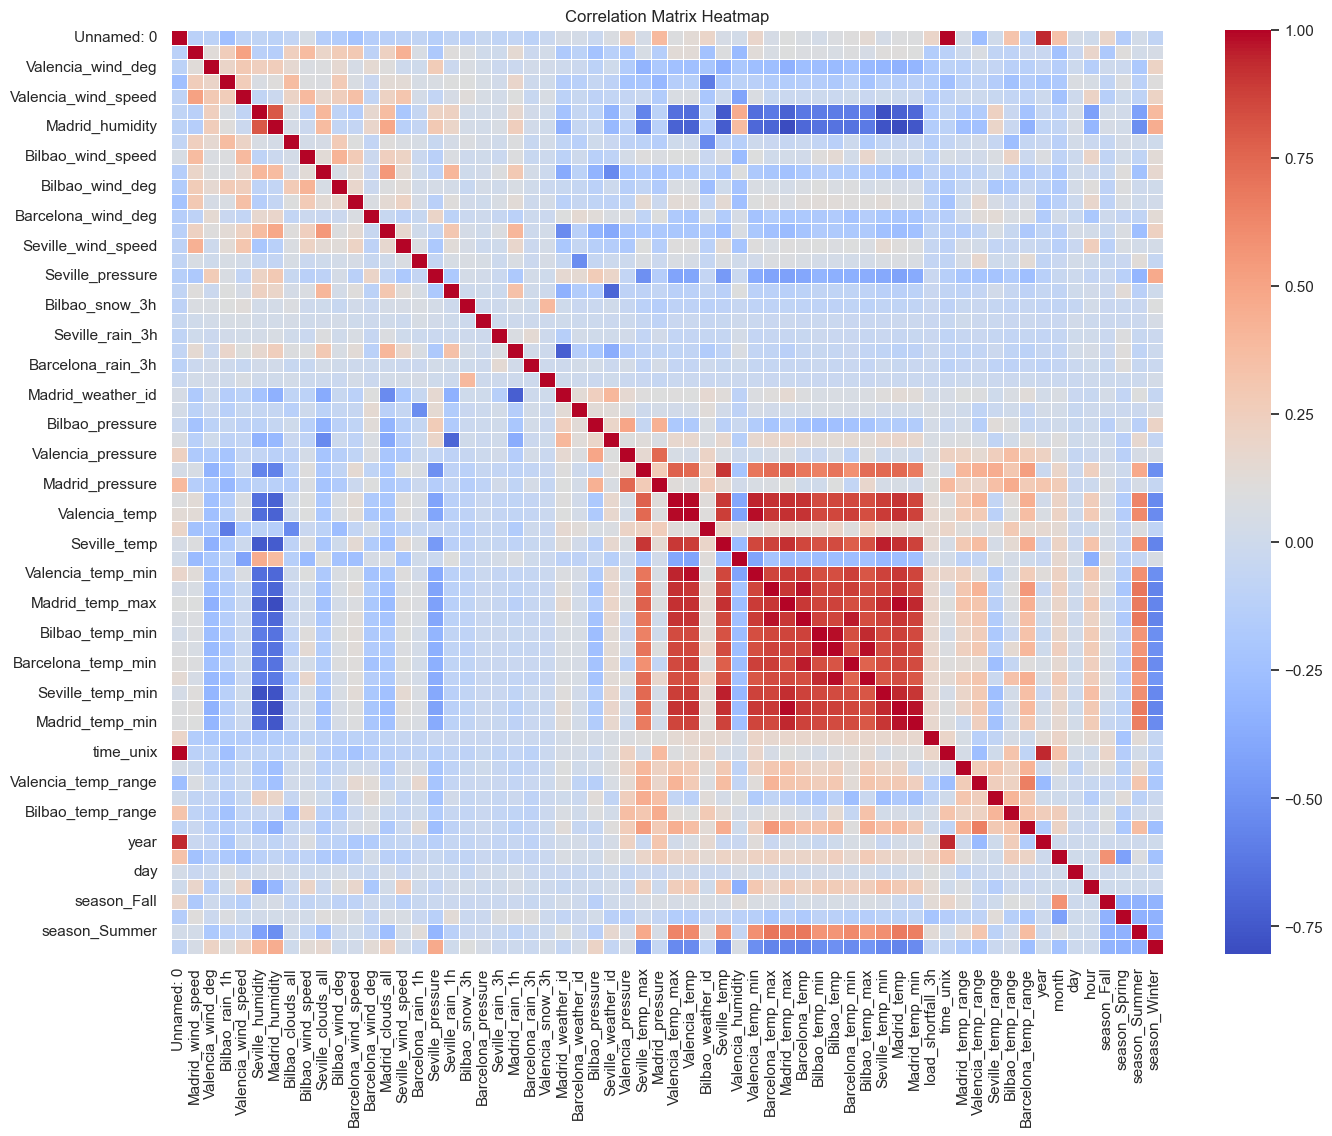

                     Unnamed: 0  Madrid_wind_speed  Valencia_wind_deg  \
Unnamed: 0             1.000000          -0.109288          -0.100737   
Madrid_wind_speed     -0.109288           1.000000           0.121835   
Valencia_wind_deg     -0.100737           0.121835           1.000000   
Bilbao_rain_1h        -0.249633           0.259719           0.199288   
Valencia_wind_speed   -0.090161           0.513092           0.292731   
...                         ...                ...                ...   
hour                   0.001272           0.186228          -0.138415   
season_Fall            0.192878          -0.182949          -0.002809   
season_Spring         -0.142515           0.110381          -0.020852   
season_Summer          0.026346           0.025949          -0.186284   
season_Winter         -0.076534           0.046272           0.211383   

                     Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  \
Unnamed: 0                -0.249633          

In [227]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print(correlation_matrix)

we can see in this heatmap that there is strong Multicollinearity between a lot of the features. To deal with this we can remove ceratin features or we can use models that are able to stabilize coefficient estimates, such as Ridge or Lasso models


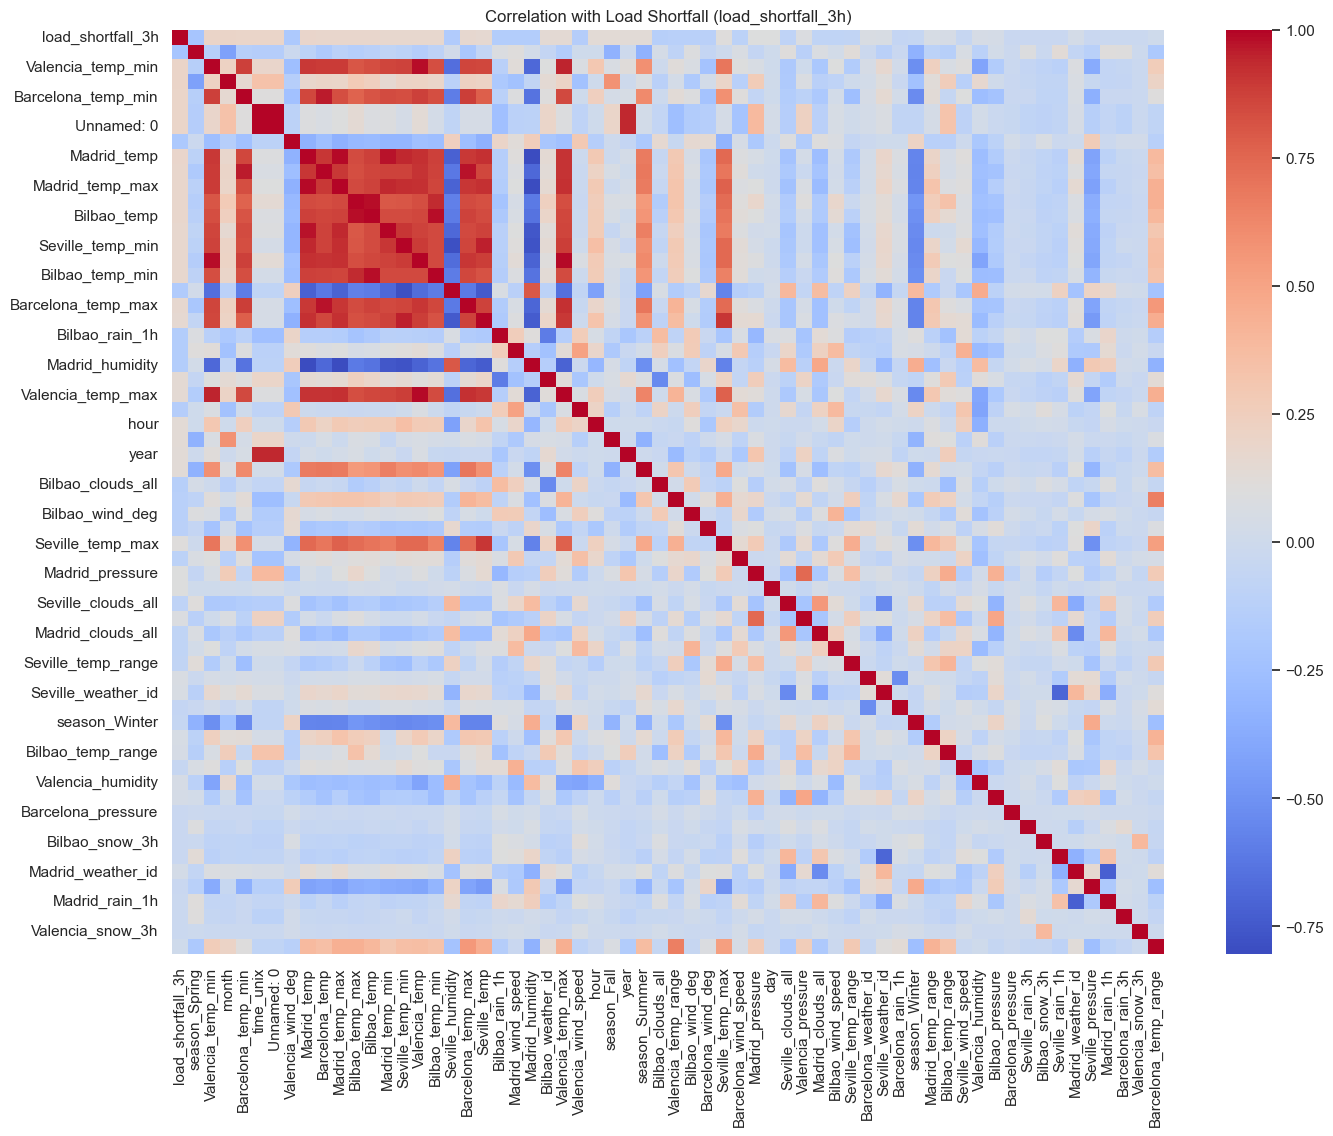

In [228]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Calculate the correlations with the target variable
target_correlations = correlation_matrix['load_shortfall_3h']

# Sort the features by their correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = correlation_matrix.loc[sorted_features, sorted_features]

# Create a heatmap for the sorted correlations without annotations
plt.figure(figsize=(16, 12))
sns.heatmap(sorted_corr_matrix, cmap='coolwarm')
plt.title('Correlation with Load Shortfall (load_shortfall_3h)')
plt.show()

In [229]:
correlation_matrix = df.corr()

# Select the correlation of the features with 'load_shortfall_3h'
correlation_with_target = correlation_matrix['load_shortfall_3h']

# Sort the correlations in descending order to see the strongest relationships
sorted_correlation_with_target = correlation_with_target.sort_values(ascending=False)

# Print or display the sorted correlations
for feature, correlation in sorted_correlation_with_target.items():
    print(f"{feature}: {correlation}")

load_shortfall_3h: 1.0
Valencia_temp_min: 0.20186343555857178
month: 0.19904827212910853
Barcelona_temp_min: 0.19598391321095454
time_unix: 0.19261374693109662
Unnamed: 0: 0.1926123970285554
Madrid_temp: 0.18603594644725543
Barcelona_temp: 0.1826729793714968
Madrid_temp_max: 0.18254839057435576
Bilbao_temp_max: 0.18093437293724474
Bilbao_temp: 0.17641053889688887
Madrid_temp_min: 0.1747436277964975
Seville_temp_min: 0.1747179762370787
Valencia_temp: 0.17322500264340554
Bilbao_temp_min: 0.17291958346617456
Barcelona_temp_max: 0.16473380788049063
Seville_temp: 0.15934281509929762
Bilbao_weather_id: 0.1458746146286632
Valencia_temp_max: 0.14427001899299668
hour: 0.13928541804626354
season_Fall: 0.13768263883559906
year: 0.1313238203645478
season_Summer: 0.12789537603896595
Seville_temp_max: 0.10983410403385871
Madrid_pressure: 0.09263803255898312
day: 0.09211631523760677
Valencia_pressure: 0.08422024097559189
Barcelona_weather_id: 0.06386812141587107
Seville_weather_id: 0.0611044972671832

Positive Correlations: Features with positive correlations indicate that as the value of the feature increases, the 'load_shortfall_3h' tends to increase as well. In other words, there is a positive linear relationship.

For example, 'Valencia_temp_min' has a positive correlation of approximately 0.202. This suggests that as the minimum temperature in Valencia increases, 'load_shortfall_3h' tends to increase as well.
Negative Correlations: Features with negative correlations suggest that as the value of the feature increases, 'load_shortfall_3h' tends to decrease. There is an inverse or negative linear relationship.

For example, 'season_Spring' has a negative correlation of approximately -0.214. This indicates that during the spring season, 'load_shortfall_3h' tends to decrease.
Magnitude of Correlation: The magnitude of the correlation coefficient (the number itself) indicates the strength of the relationship. A correlation value of 1.0 means a perfect positive correlation, while -1.0 means a perfect negative correlation. Values closer to 0 indicate a weaker or no linear relationship.

For 'load_shortfall_3h' itself, the correlation is 1.0 because it's perfectly correlated with itself.

These correlation values help identify potentially important features for predicting the target variable in the machine learning model. Positive or negative correlations can guide feature selection and engineering decisions during model building.


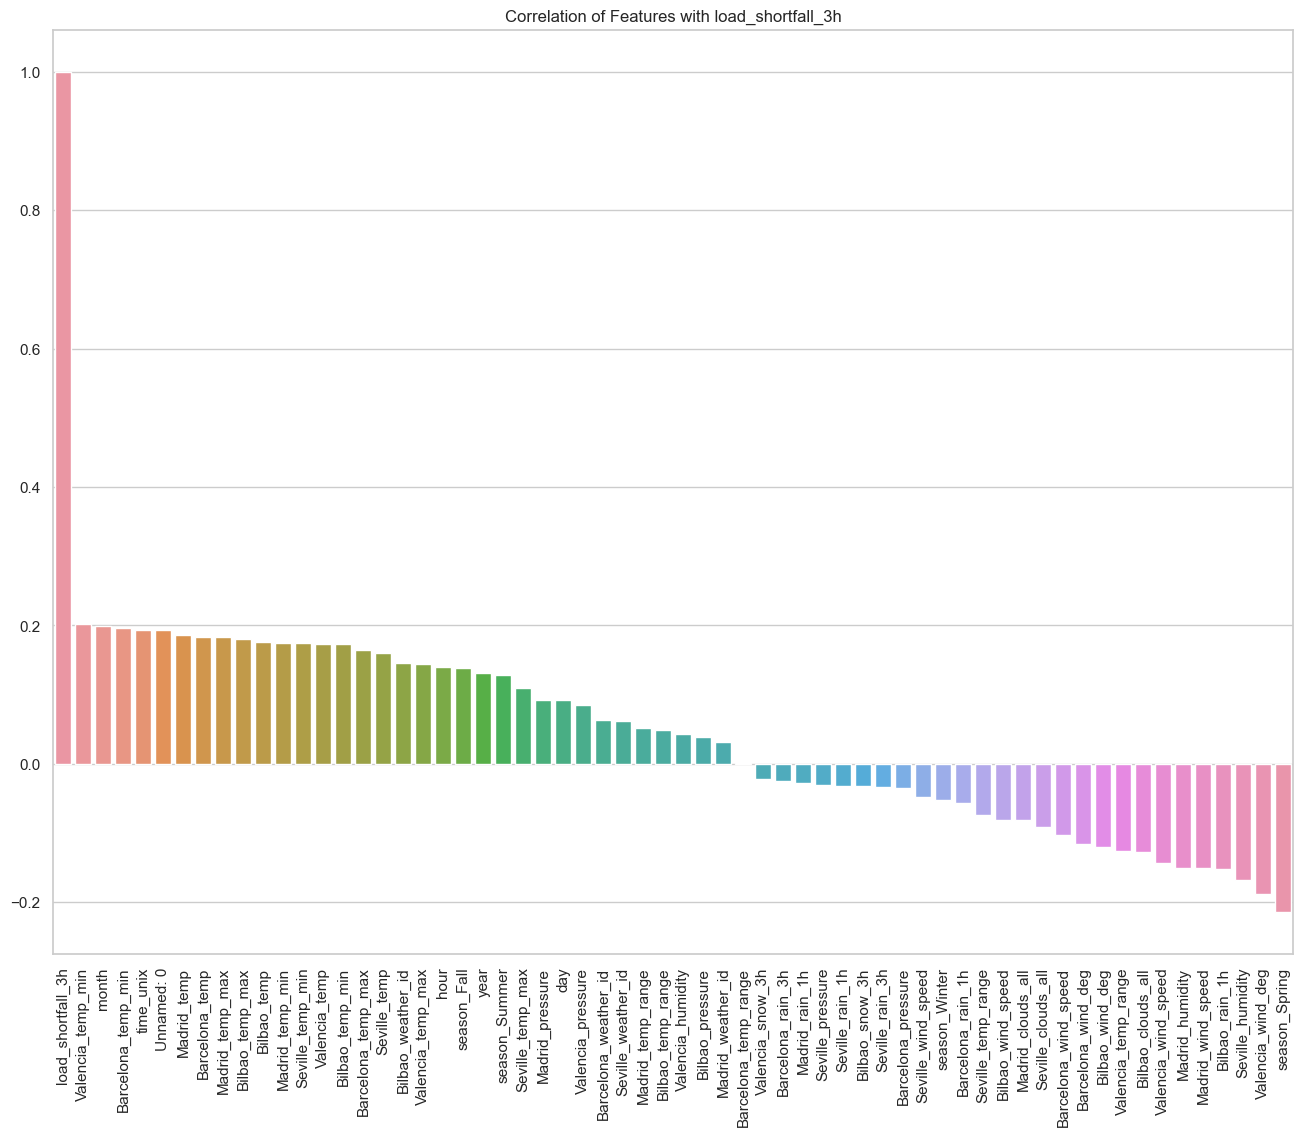

In [230]:
# Create a bar plot of feature correlations with 'load_shortfall_3h'
plt.figure(figsize=(16, 12))
sns.barplot(x=sorted_correlation_with_target.index, y=sorted_correlation_with_target.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with load_shortfall_3h')
plt.show()

Next up are regression plots to asses the linear relationships between the features and out target variable ' load_shortfall_3h'.


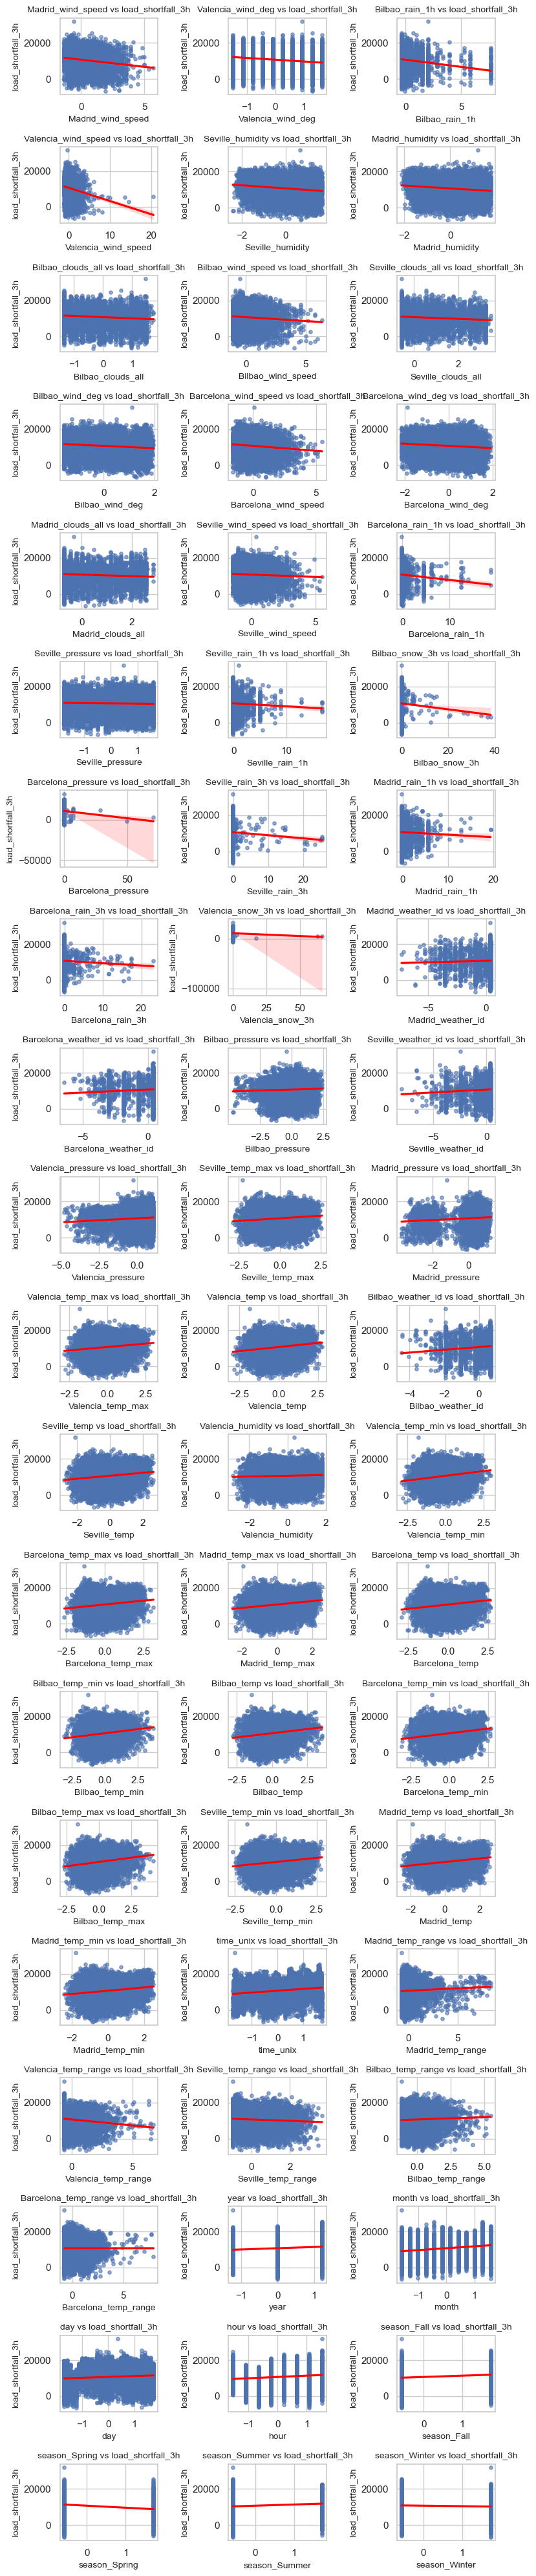

In [349]:
selected_features = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'time_unix', 'Madrid_temp_range',
       'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range',
       'Barcelona_temp_range', 'year', 'month', 'day', 'hour',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']  

target_variable = 'load_shortfall_3h'   

X1 = df[selected_features]
y1 = df[target_variable]

# Set the number of columns in the grid
num_cols = 3
# Calculate the number of rows needed
num_rows = int(np.ceil(len(selected_features) / num_cols))

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 2*num_rows))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Visualize regression plots in the grid
for i, feature in enumerate(X1.columns):
    sns.regplot(x=feature, y=target_variable, data=df, scatter_kws={'s': 15, 'alpha': 0.6}, line_kws={'color': 'red'}, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target_variable}', fontsize=10)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel(target_variable, fontsize=10)

# Remove any empty subplots
for i in range(len(selected_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout to prevent clipping of titles
plt.tight_layout()
plt.show()


### Feature Distributions


#### Target Variable Distribution


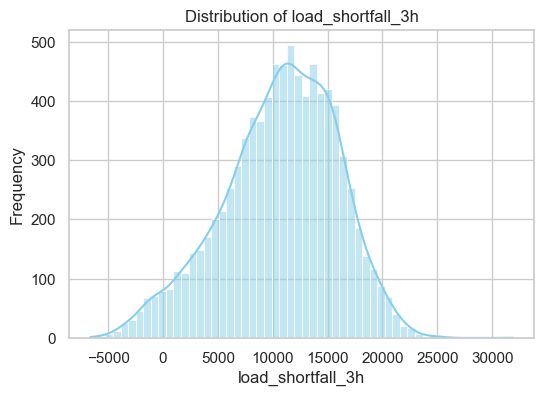

In [351]:
# Plot the distribution of the target variable 'load_shortfall_3h'
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='load_shortfall_3h', kde=True, color='skyblue')
plt.title('Distribution of load_shortfall_3h')
plt.xlabel('load_shortfall_3h')
plt.ylabel('Frequency')
plt.show()

A histogram plot showing that the target variable load_shortfall_3h is approximately normally distributed with values between -5,000 and 30,000 and the peak around 12,000 provides valuable insights into your data:

Normal Distribution: The fact that the distribution of load_shortfall_3h closely resembles a normal distribution suggests that the data follows a bell-shaped curve, which is a common assumption in many statistical and machine learning models.

Central Tendency: The peak around 12,000 indicates that this value is the mode of the distribution, i.e., the most frequent load shortfall value. This value could represent typical energy generation shortfalls during the specified time intervals.

Spread: The range of -5,000 to 30,000 suggests that the load shortfalls can vary widely, from negative values (excess energy generation) to positive values (shortfall in energy generation). Understanding this spread is crucial for identifying when energy generation falls short or exceeds demand.

Symmetry: The symmetric nature of the distribution is characteristic of a normal distribution, where the mean (average) and median (middle value) are approximately equal. This implies that on average, the load shortfall is centered around 12,000.

Outliers: The histogram can also help you identify any potential outliers (extreme values) in your data. If you notice data points far from the central peak, they could be outliers that might require further investigation.


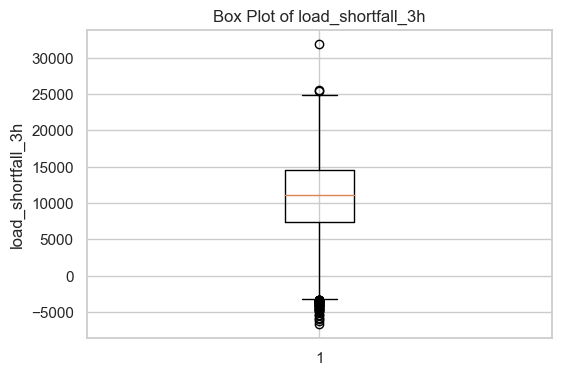

In [350]:
# Create a box plot for the target variable
plt.figure(figsize=(6, 4))
plt.boxplot(df['load_shortfall_3h'])
plt.title('Box Plot of load_shortfall_3h')
plt.ylabel('load_shortfall_3h')
plt.show()

#### Time Analysis


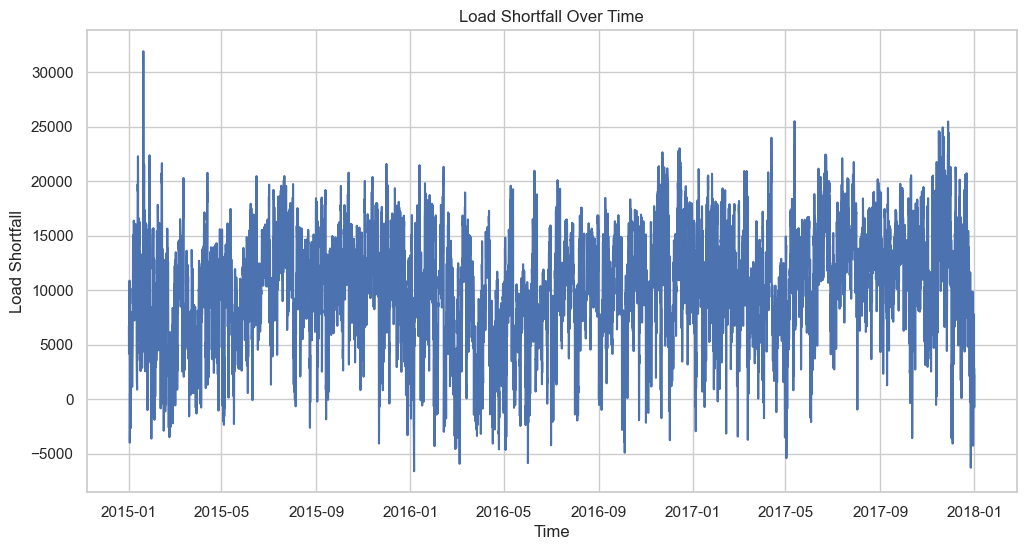

In [234]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='load_shortfall_3h', data=df)
plt.title('Load Shortfall Over Time')
plt.xlabel('Time')
plt.ylabel('Load Shortfall')
plt.show()

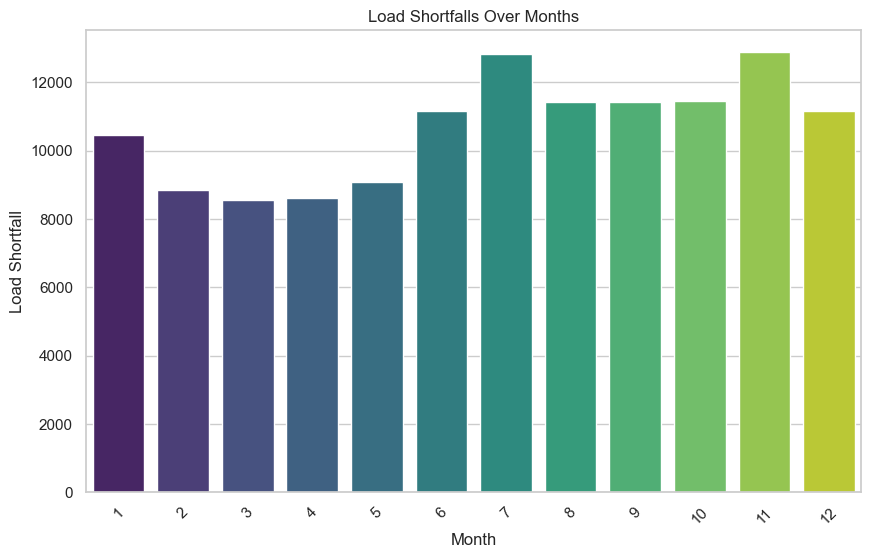

In [235]:
# Create a bar plot of load shortfalls over months
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='load_shortfall_3h', data=df, ci=None, palette='viridis')
plt.title('Load Shortfalls Over Months')
plt.xlabel('Month')
plt.ylabel('Load Shortfall')
plt.xticks(rotation=45)
plt.show()

the month with the lower load shortfall are February, March and April. These months are the end of Winter and Spring This indicates that either there is less energy demand during these months or that there is increased production of renewable energy during these months (or a combination of both) leading to lower load shortfall values.


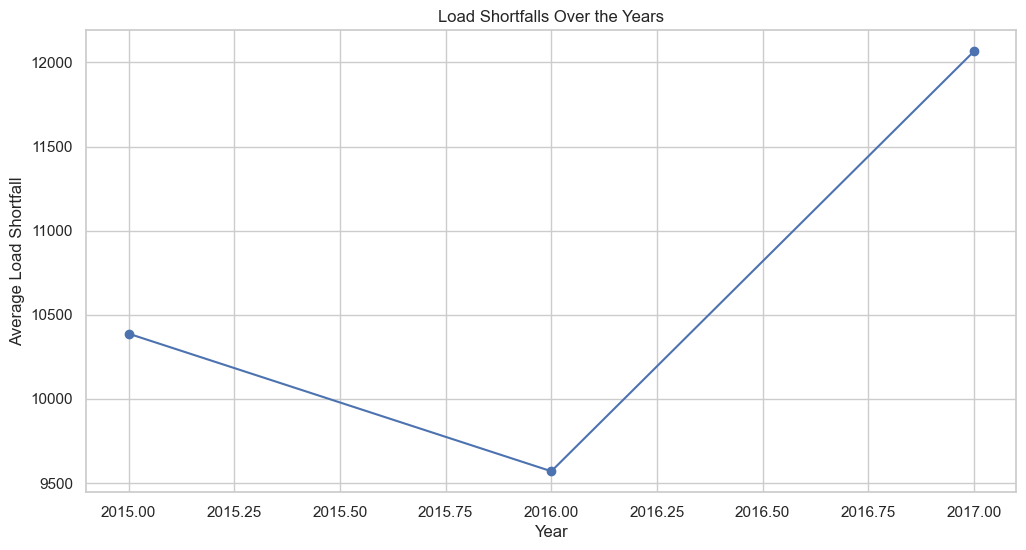

In [236]:
# Group the data by year and calculate the mean load shortfalls for each year
yearly_load_shortfalls = df.groupby(df['year'])['load_shortfall_3h'].mean()

# Create a line plot to visualize load shortfalls over years
plt.figure(figsize=(12, 6))
plt.plot(yearly_load_shortfalls.index, yearly_load_shortfalls.values, marker='o')
plt.title('Load Shortfalls Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Load Shortfall')
plt.grid(True)
plt.show()

why was the load shortfall the best in 2016?


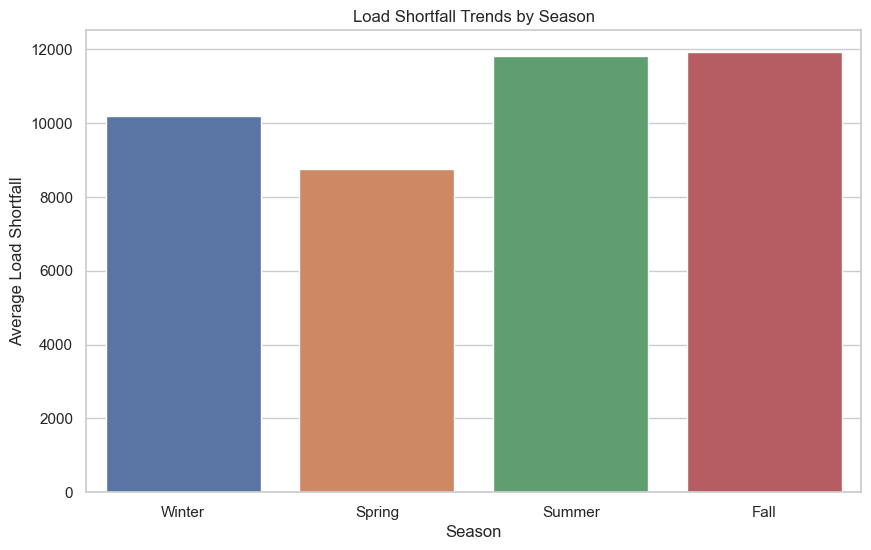

In [237]:
# Group the data by the 'season' feature and calculate the mean load shortfall for each season
seasonal_load_shortfall = df.groupby('season')['load_shortfall_3h'].mean().reset_index()

# Sort the seasons in an order that makes sense
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Plot the load shortfall trends for the seasons
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='load_shortfall_3h', data=seasonal_load_shortfall, order=season_order)
plt.title('Load Shortfall Trends by Season')
plt.xlabel('Season')
plt.ylabel('Average Load Shortfall')
plt.show()

Lets have a look at what kind ove weather conidtions are prevalent during the months to see which seasons are rainy, cloudy, hot, cold, humid, windy.


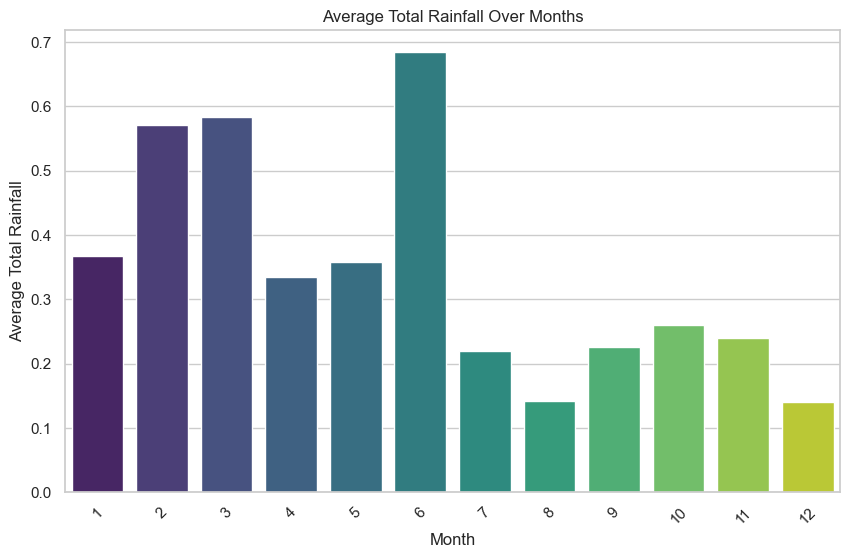

In [238]:
# Select the relevant rainfall columns
rainfall_columns = ['Bilbao_rain_1h', 'Barcelona_rain_1h', 'Seville_rain_1h', 'Madrid_rain_1h']

# Group the DataFrame by month and calculate the mean total rainfall for each month
monthly_average_rainfall = df.groupby('month')[rainfall_columns].mean().sum(axis=1)

# Reset the index for plotting
monthly_average_rainfall = monthly_average_rainfall.reset_index()

# Plot the average total rainfall over the months
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y=0, data=monthly_average_rainfall, ci=None, palette='viridis')
plt.title('Average Total Rainfall Over Months')
plt.xlabel('Month')
plt.ylabel('Average Total Rainfall')
plt.xticks(rotation=45)
plt.show()


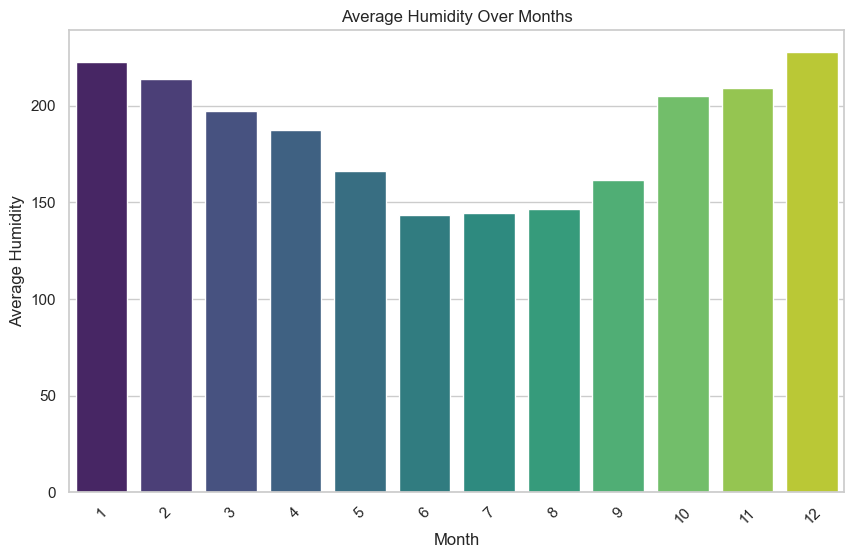

In [239]:
# Define the humidity columns
humidity_columns = ['Seville_humidity', 'Madrid_humidity', 'Valencia_humidity']

# Calculate the average total humidity for each month
monthly_average_humidity = df.groupby('month')[humidity_columns].mean().sum(axis=1)

# Reset the index for plotting
monthly_average_humidity = monthly_average_humidity.reset_index()

# Plot the average humidity over the months
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y=0, data=monthly_average_humidity, ci=None, palette='viridis')
plt.title('Average Humidity Over Months')
plt.xlabel('Month')
plt.ylabel('Average Humidity')
plt.xticks(rotation=45)
plt.show()


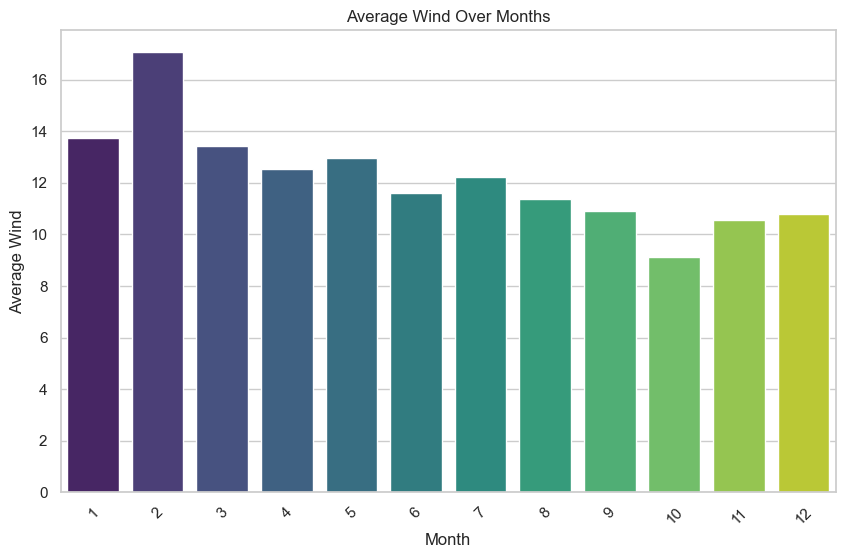

In [240]:
# Define the wind columns
wind_columns = ['Madrid_wind_speed', 'Valencia_wind_speed', 'Bilbao_wind_speed', 'Barcelona_wind_speed', 'Seville_wind_speed']

# Calculate the average total wind for each month
monthly_average_wind = df.groupby('month')[wind_columns].mean().sum(axis=1)

# Reset the index for plotting
monthly_average_wind = monthly_average_wind.reset_index()

# Plot the average wind over the months
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y=0, data=monthly_average_wind, ci=None, palette='viridis')
plt.title('Average Wind Over Months')
plt.xlabel('Month')
plt.ylabel('Average Wind')
plt.xticks(rotation=45)
plt.show()


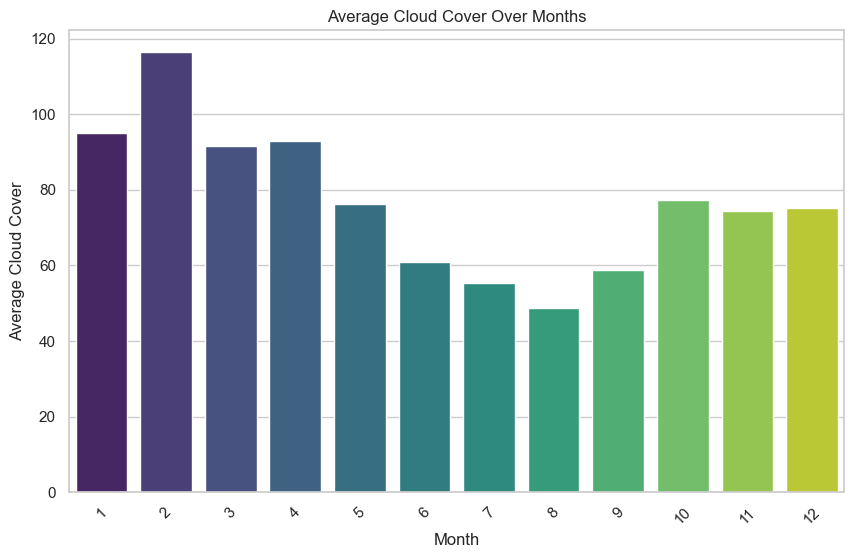

In [241]:
# Define the clouds columns
clouds_columns = ['Bilbao_clouds_all', 'Seville_clouds_all', 'Madrid_clouds_all']

# Calculate the average total cloud cover for each month
monthly_average_clouds = df.groupby('month')[clouds_columns].mean().sum(axis=1)

# Reset the index for plotting
monthly_average_clouds = monthly_average_clouds.reset_index()

# Plot the average cloud cover over the months
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y=0, data=monthly_average_clouds, ci=None, palette='viridis')
plt.title('Average Cloud Cover Over Months')
plt.xlabel('Month')
plt.ylabel('Average Cloud Cover')
plt.xticks(rotation=45)
plt.show()


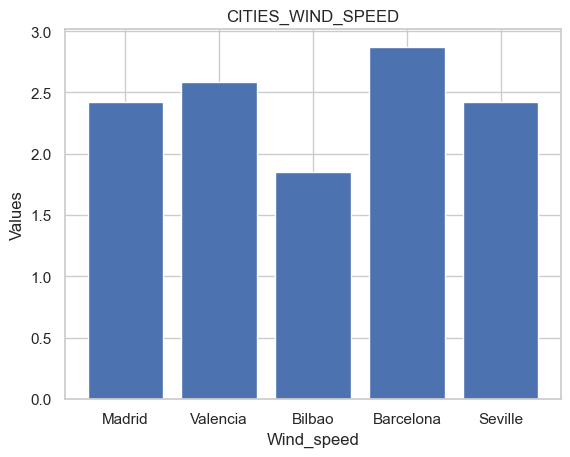

In [242]:
categories = ['Madrid','Valencia','Bilbao','Barcelona','Seville',]
values = [df.Madrid_wind_speed.mean(), df.Valencia_wind_speed.mean(), df.Bilbao_wind_speed.mean(), df.Barcelona_wind_speed.mean(), df.Seville_wind_speed.mean()]

plt.bar(categories, values)

plt.title('CITIES_WIND_SPEED')
plt.xlabel('Wind_speed')
plt.ylabel('Values')

plt.show()

From the data, Barcelona, a coastal Spain city, has the highest wind speed making the most suitable for wind power generation


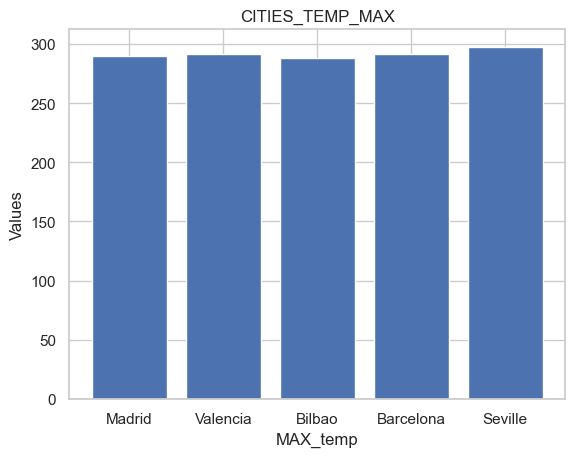

In [243]:
categories = ['Madrid','Valencia','Bilbao','Barcelona','Seville',]
values = [df.Madrid_temp_max.mean(), df.Valencia_temp_max.mean(), df.Bilbao_temp_max.mean(), df.Barcelona_temp_max.mean(), df.Seville_temp_max.mean()]

plt.bar(categories, values)

plt.title('CITIES_TEMP_MAX')
plt.xlabel('MAX_temp')
plt.ylabel('Values')

plt.show()

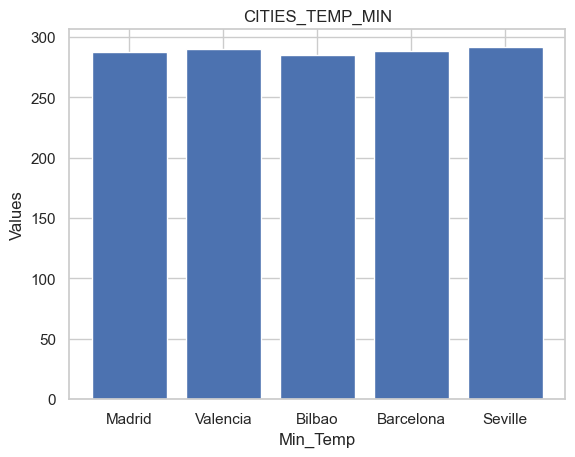

In [244]:
categories = ['Madrid','Valencia','Bilbao','Barcelona','Seville',]
values = [df.Madrid_temp_min.mean(), df.Valencia_temp_min.mean(), df.Bilbao_temp_min.mean(), df.Barcelona_temp_min.mean(), df.Seville_temp_min.mean()]

plt.bar(categories, values)

plt.title('CITIES_TEMP_MIN')
plt.xlabel('Min_Temp')
plt.ylabel('Values')

plt.show()

There is no significant difference in the temeperatures of the cities


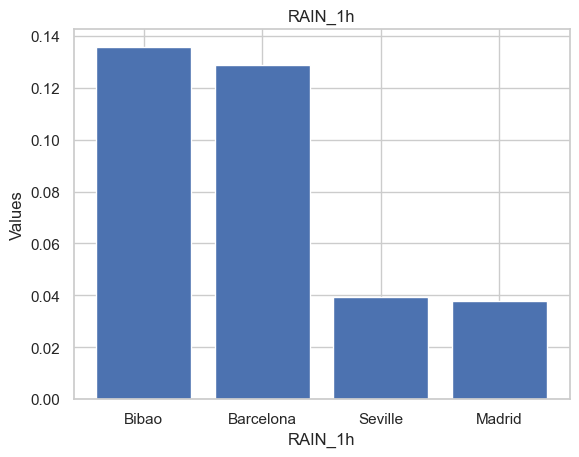

In [245]:
categories = ['Bibao','Barcelona','Seville','Madrid']
values = [df.Bilbao_rain_1h.mean(), df.Barcelona_rain_1h.mean(),df.Seville_rain_1h.mean(), df.Madrid_rain_1h.mean()]

plt.bar(categories, values)

plt.title('RAIN_1h')
plt.xlabel('RAIN_1h')
plt.ylabel('Values')

plt.show()

From the data, Bilbao has the highest amount of rainfall - this means that rivers and dams in Bilbao are more likely to be full making it preferable for dams hydroelectric generation.


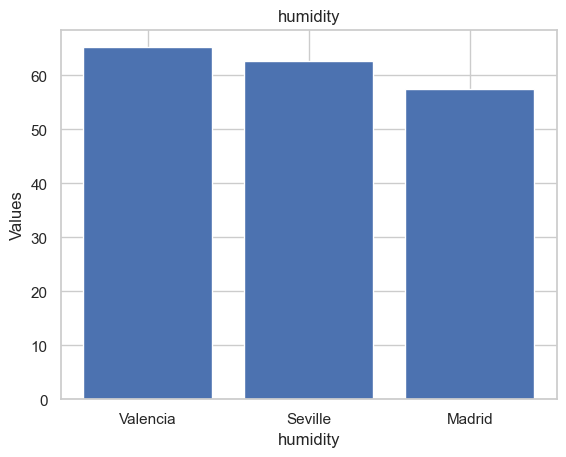

In [246]:
categories = ['Valencia','Seville','Madrid']
values = [df.Valencia_humidity.mean(), df.Seville_humidity.mean(), df.Madrid_humidity.mean()]

plt.bar(categories, values)

plt.title('humidity')
plt.xlabel('humidity')
plt.ylabel('Values')

plt.show()

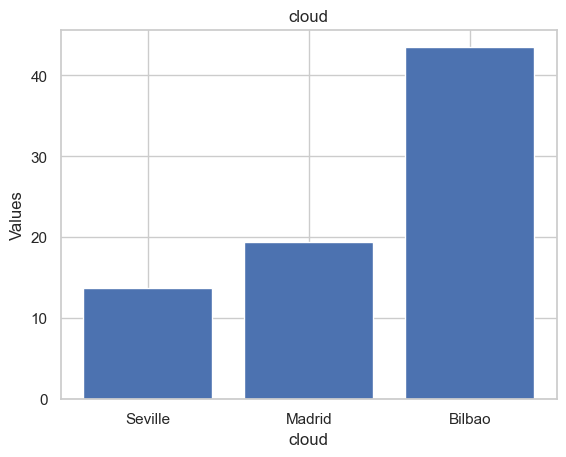

In [247]:
categories = ['Seville','Madrid','Bilbao']
values = [df.Seville_clouds_all.mean(), df.Madrid_clouds_all.mean(),df.Bilbao_clouds_all.mean()]

plt.bar(categories, values)

plt.title('cloud')
plt.xlabel('cloud')
plt.ylabel('Values')

plt.show()

Bilbao has the most cloud cover this makes Bilbao the least city suitable for solar power generation


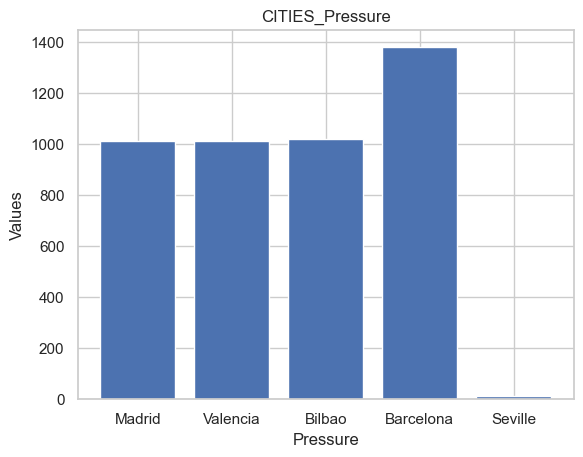

In [248]:
categories = ['Madrid','Valencia','Bilbao','Barcelona','Seville',]
values = [df.Madrid_pressure.mean(), df.Valencia_pressure.mean(), df.Bilbao_pressure.mean(), df.Barcelona_pressure.mean(), df.Seville_pressure.mean()]

plt.bar(categories, values)

plt.title('CITIES_Pressure')
plt.xlabel('Pressure')
plt.ylabel('Values')

plt.show()

The cities with highest atm pressure are associated with clear skies and less rainfall - Valencia and Madrid are more suitable for solar power generation


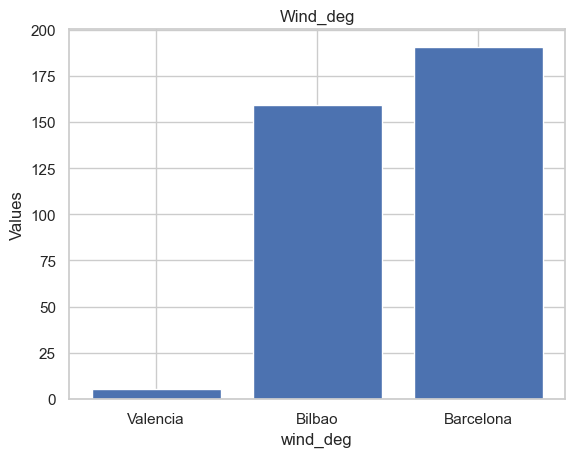

In [249]:
categories = ['Valencia','Bilbao','Barcelona']
values = [df.Valencia_wind_deg.mean(), df.Bilbao_wind_deg.mean(), df.Barcelona_wind_deg.mean()]

plt.bar(categories, values)

plt.title('Wind_deg')
plt.xlabel('wind_deg')
plt.ylabel('Values')

plt.show()

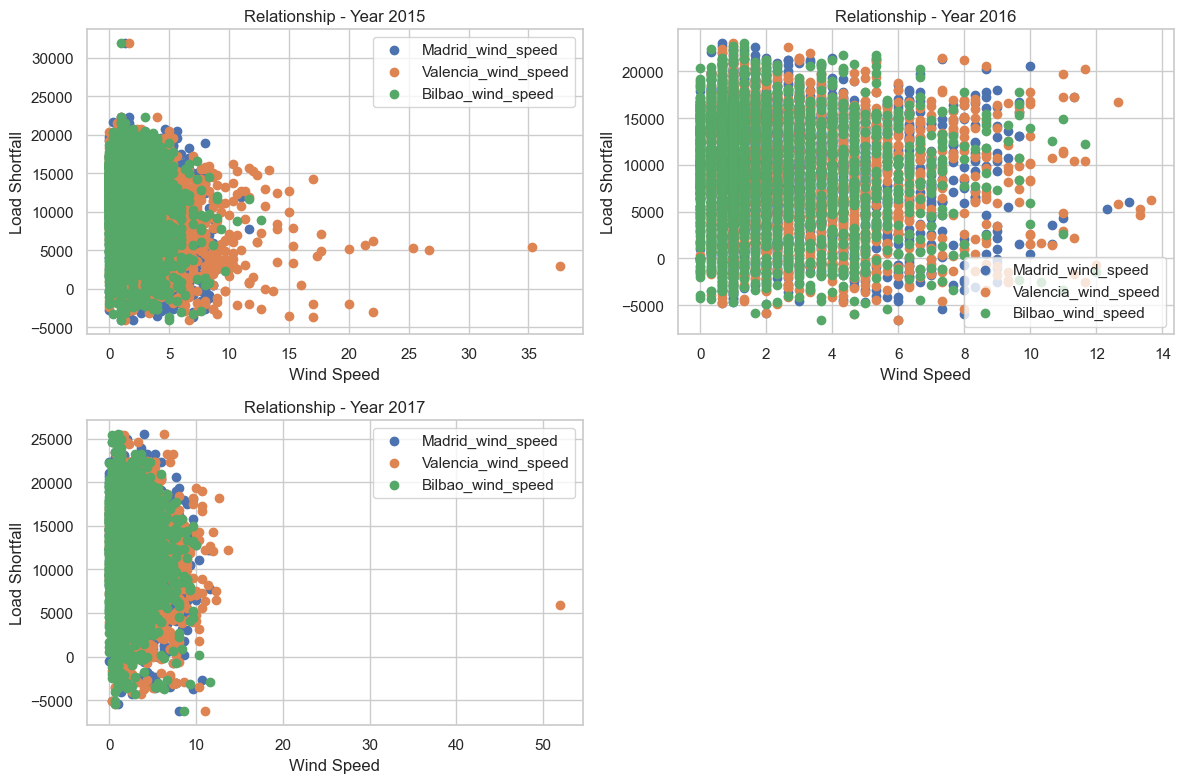

In [250]:
# Group the DataFrame by 'year'
grouped = df.groupby('year')

# Get unique years
unique_years = df['year'].unique()

# Scatter plots for the relationship between wind speed and load shortfall for each year
plt.figure(figsize=(12, 8))
for i, year in enumerate(unique_years, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    group = grouped.get_group(year)
    for wind_speed_feature in ["Madrid_wind_speed", "Valencia_wind_speed", "Bilbao_wind_speed"]:
        plt.scatter(group[wind_speed_feature], group['load_shortfall_3h'], label=wind_speed_feature)
    plt.xlabel('Wind Speed')
    plt.ylabel('Load Shortfall')
    plt.title(f'Relationship - Year {year}')
    plt.legend()

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

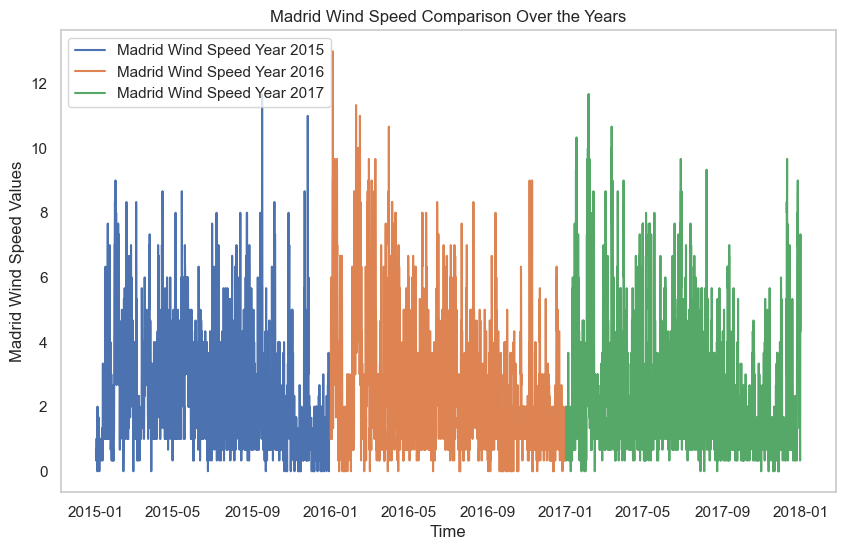

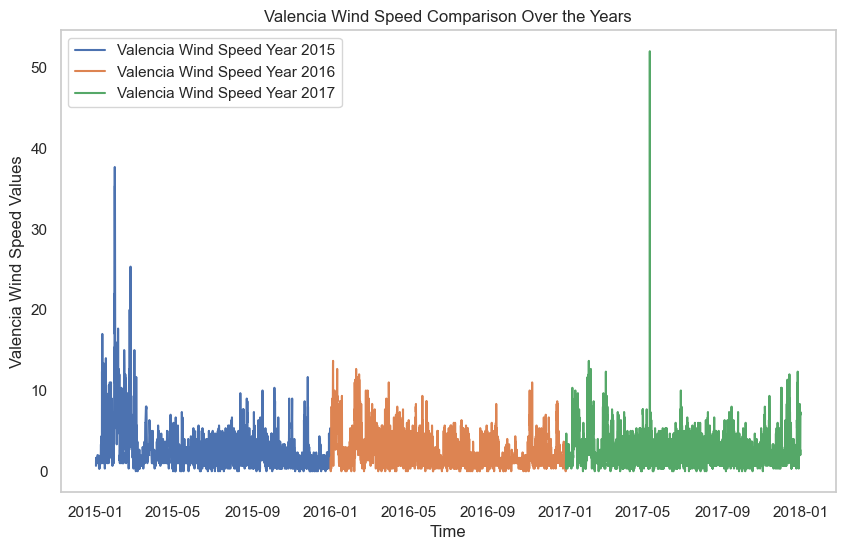

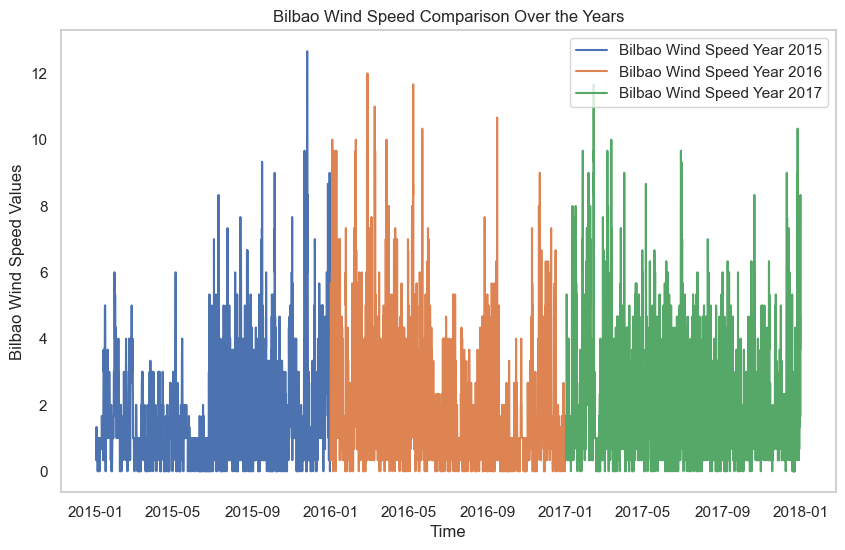

In [251]:
cities = ["Madrid", "Valencia", "Bilbao"]

# SEPARATE LINE GRAPHS FOR THE CITIES
plt.figure(figsize=(10, 6))

for city in cities:
    plt.figure(figsize=(10, 6))
    for year, group in grouped:
        wind_speed = f"{city}_wind_speed"
        plt.plot(group['time'], group[wind_speed], label=f'{city} Wind Speed Year {year}')

    plt.xlabel('Time')
    plt.ylabel(f'{city} Wind Speed Values')
    plt.title(f'{city} Wind Speed Comparison Over the Years')
    plt.legend()
    plt.grid()

# Show the plots
plt.show()

### Feature Selection


In [253]:
df = df.drop('Unnamed: 0', axis=1)


### Normalize values


We had tested various forms of rescaling using various imports, such as min-max scaling, robust scaler etc. We did not notice a difference between the various options, so we decided to use standard scaler. Our data exploration revealed there were outliers and that a lot of the features were not normally distributed.StandardScaler is less sensitive to the influence of outliers compared to some other scaling methods, like Min-Max scaling. Some models, especially those based on statistical assumptions, assume that the features are normally distributed. StandardScaler can help approximate normality, although it's not a guarantee.


In [254]:

from sklearn.preprocessing import StandardScaler  # Use StandardScaler for standardization

# Define the features to normalize
features_to_normalize = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'time_unix', 'Madrid_temp_range',
       'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range',
       'Barcelona_temp_range', 'year', 'month', 'day', 'hour',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']  # Add all your feature columns here

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

<a id="five"></a>

## 5. Modelling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡                                                                                                                |
| :------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---


### split data


In [255]:

# Split the data into features (X) and target (y)
X = df.drop(columns=['time', 'load_shortfall_3h', 'season'])  # Features (exclude the target). drop any object type features
y = df['load_shortfall_3h']  # Target variable

In [256]:
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42) is splitting the data into training and validation sets.

X and y are the feature matrix and target variable, respectively. X contains the features we use to make predictions, and y contains the corresponding target values (in this case, load_shortfall_3h).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables).
y: The target variable (dependent variable).
test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training.
random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible.

train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set.
X_val: This contains the feature data for the validation set.
y_train: This contains the target data for the training set.
y_val: This contains the target data for the validation set.
By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows us to estimate how well your model is likely to perform on unseen data (seen in Model Performance section).


#### Linear reg model


The model assumes a linear equation in the form y=mx+b, where
y represents the energy shortfall,
x denotes the selected features,
m is the slope, and
b is the intercept.

The model "learns" the optimal values for m and b by minimizing the difference between predicted and actual energy shortfalls in the training data.

Once trained, the model can predict energy shortfalls for new data, providing insights into the relationship between specific features and energy variations.


In [257]:
# Create a Linear Regression model
model_Linear = LinearRegression()

# Train the Linear Regression model on the training data
model_Linear.fit(X_train, y_train)

# Make predictions on the validation set and the training set 
y_pred_Linear = model_Linear.predict(X_valid)

y_pred_linear_train = model_Linear.predict(X_train)



#### Random Forest model


The Random Forest model extends the capabilities of decision trees by constructing an ensemble of multiple trees, each contributing to the prediction of 3-hourly energy shortfalls in Spain.

It builds a collection of decision trees during training, where each tree is trained on a subset of the data and features. This ensemble leverages the diversity of individual trees to enhance overall accuracy and robustness.

Each tree independently predicts energy shortfalls based on a subset of features, capturing different aspects of the complex relationship between weather conditions, time-related variables, and energy production.

During prediction, the model aggregates the individual tree predictions through averaging. This ensemble approach provides a more reliable estimate of energy shortfalls, particularly beneficial for capturing diverse patterns and trends.

Parameters like the number of trees, minimum samples per leaf, and minimum samples for splitting are tuned to optimize model performance. For this project, the best hyperparameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.


In [337]:
# Create a Random Forest model
model_RF = RandomForestRegressor(n_estimators=200, min_samples_leaf= 1, min_samples_split= 2, random_state=42)  # You can adjust hyperparameters

# Train the Random Forest model on the training data
model_RF.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_RF = model_RF.predict(X_valid)

y_pred_RF_train = model_RF.predict(X_train)

#### Lasso model


Lasso introduces an L1 penalty to the linear regression model, promoting sparsity in feature selection. This means it encourages some feature coefficients to become exactly zero, effectively selecting a subset of the most influential features.

The hyperparameter 'alpha' controls the strength of the regularization. In this model, alpha is set to 0.001, influencing the trade-off between fitting the training data and simplicity in feature selection.

During training, Lasso identifies and assigns weights to the most influential features related to energy shortfalls. The model is then used to make predictions on both the training and validation sets.


In [300]:
lasso_model = Lasso(alpha=0.001)  # Adjust the alpha value as needed

y_pred_lasso = cross_val_predict(lasso_model, X_train, y_train, cv=5)

lasso_model.fit(X_train, y_train)

y_pred_lasso_valid = lasso_model.predict(X_valid)

y_pred_lasso_train = lasso_model.predict(X_train)

#### Ridge model


Ridge regression applies an L2 penalty to the linear regression model, preventing large coefficients and promoting a more balanced contribution from all features. This helps mitigate multicollinearity.

During training, Ridge identifies and assigns optimal weights to features associated with energy shortfalls. The model is then used to make predictions on both the training and validation sets.


In [301]:
ridge_model = Ridge(alpha=0.001)  # Adjust the alpha value as needed

y_pred_ridge = cross_val_predict(ridge_model, X_train, y_train, cv=5)

ridge_model.fit(X_train, y_train)

y_pred_ridge_valid = ridge_model.predict(X_valid)

y_pred_ridge_train = ridge_model.predict(X_train)

#### XGBoost model


XGBoost is a powerful ensemble learning method that combines the predictions of multiple decision trees. It uses a gradient boosting framework and incorporates regularization techniques to prevent overfitting. The key parameters include the number of trees, learning rate, maximum depth, and random state. Adjusting these parameters allows for fine-tuning the model's performance.


In [302]:
# Create an XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use regression objective
    n_estimators=200,  # You can adjust the number of trees
    learning_rate=0.1,  # Adjust the learning rate
    max_depth=7,  # Adjust the maximum depth of each tree
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb_valid = xgb_model.predict(X_valid)

y_pred_xgb_train = xgb_model.predict(X_train)

### Hyperparameter tuning using Grid Search


Grid Search was used to search which parameters would result in a more accurate model. The printed results were used in the modeling section for all of the models created. **NOTE** This code takes a long while to run (90 mins)


In [297]:

# Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Lasso
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1]
}

grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_

# Ridge
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1]
}

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_

# XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train, y_train)
best_xgb_model = grid_search_xgb.best_estimator_

# Assess the performance of the best models on the validation set
y_pred_rf_valid = best_rf_model.predict(X_valid)
y_pred_lasso_valid = best_lasso_model.predict(X_valid)
y_pred_ridge_valid = best_ridge_model.predict(X_valid)
y_pred_xgb_valid = best_xgb_model.predict(X_valid)


In [298]:
# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Best parameters for Lasso
best_params_lasso = grid_search_lasso.best_params_
print("Best Parameters for Lasso:", best_params_lasso)

# Best parameters for Ridge
best_params_ridge = grid_search_ridge.best_params_
print("Best Parameters for Ridge:", best_params_ridge)

# Best parameters for XGBoost
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters for XGBoost:", best_params_xgb)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Parameters for Lasso: {'alpha': 0.001}
Best Parameters for Ridge: {'alpha': 0.001}
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


### Test Dataframe Data Engineering


Any changes that were made to the train dataframe are also applied to the test dataframe in this section


In [262]:
null_percentage = test_df['Valencia_pressure'].isna().mean() * 100
print("Percentage of Null Values in Valencia_pressure:", null_percentage)

Percentage of Null Values in Valencia_pressure: 15.547945205479452


In [263]:
median_valencia_pressure = test_df['Valencia_pressure'].median()

In [264]:
test_df['Valencia_pressure'].fillna(median_valencia_pressure, inplace=True)

In [265]:

test_df['time'] = pd.to_datetime(test_df['time'])

test_df['time_unix'] = (test_df['time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [266]:
test_df['Valencia_wind_deg'] = test_df['Valencia_wind_deg'].str.extract('(\d+)', expand=False).astype(float)

In [267]:
test_df['Seville_pressure'] = test_df['Seville_pressure'].str.extract('(\d+)', expand=False).astype(float)

In [268]:
test_df['Madrid_temp_range'] = test_df['Madrid_temp_max'] - test_df['Madrid_temp_min']
test_df['Valencia_temp_range'] = test_df['Valencia_temp_max'] - test_df['Valencia_temp_min']
test_df['Seville_temp_range'] = test_df['Seville_temp_max'] - test_df['Seville_temp_min']
test_df['Bilbao_temp_range'] = test_df['Bilbao_temp_max'] - test_df['Bilbao_temp_min']
test_df['Barcelona_temp_range'] = test_df['Barcelona_temp_max'] - test_df['Barcelona_temp_min']

In [269]:
test_df['year'] = test_df['time'].dt.year
test_df['month'] = test_df['time'].dt.month
test_df['day'] = test_df['time'].dt.day
test_df['hour'] = test_df['time'].dt.hour

In [270]:
test_df['season'] = test_df['month'].map(season_mapping)

In [271]:

season_dummies = pd.get_dummies(test_df['season'], prefix='season')

test_df = pd.concat([test_df, season_dummies], axis=1)

In [272]:
test_df = test_df.drop('Unnamed: 0', axis=1)


In [273]:
# Define the features to normalize
features_to_normalize = ['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'time_unix', 'Madrid_temp_range',
       'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range',
       'Barcelona_temp_range', 'year', 'month', 'day', 'hour',
       'season_Fall', 'season_Spring', 'season_Summer', 'season_Winter']  # Add all your feature columns here

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
test_df[features_to_normalize] = scaler.fit_transform(test_df[features_to_normalize])

### Testing


In [338]:
# Exclude the 'time' column from the test data
X_test = test_df.drop(columns=['time', 'season'])

In [309]:
# Make predictions on the test data using the Linear Regression model
test_predictions_Linear = model_Linear.predict(X_test)

In [339]:
# Make predictions on the test data using the Random Forest model
test_predictions_RF = model_RF.predict(X_test)

In [314]:
# Make predictions on the test data using the Lasso model
test_predictions_lasso = lasso_model.predict(X_test)

In [315]:
# Make predictions on the test data using the Ridge model
test_predictions_ridge = ridge_model.predict(X_test)

In [316]:
# Make predictions on the test data using the XGBoost model
test_predictions_xgb = xgb_model.predict(X_test)

### Submission Generation


In [327]:
# Create a DataFrame for the submission (Linear Regression)
submission_Linear = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions_Linear
})

In [328]:
# Export the submission DataFrame to a CSV file
submission_Linear.to_csv('submission_Linear.csv', index=False)

In [340]:
# Create a DataFrame for the submission (Random Forest)
submission_RF = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions_RF
})

In [341]:
# Export the second submission DataFrame to a CSV file
submission_RF.to_csv('submission_RF.csv', index=False)

In [331]:
# Create a DataFrame for the submission (Lasso)
submission_lasso = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions_lasso
})

In [332]:
submission_lasso.to_csv('submission_lasso.csv', index=False)

In [333]:
# Create a DataFrame for the submission (Ridge)
submission_ridge = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions_ridge
})

In [334]:
submission_ridge.to_csv('submission_ridge.csv', index=False)

In [335]:
# Create a DataFrame for the submission (XGBoost)
submission_xgb = pd.DataFrame({
    'time': test_df['time'],
    'load_shortfall_3h': test_predictions_xgb
})

In [336]:
submission_xgb.to_csv('submission_xgb.csv', index=False)

<a id="six"></a>

## 6. Model Performance

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡                                                                                                                                      |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


## Compare model performance


In [303]:
# Evaluate the accuracy of the Linear Regression model
rmse_Linear_valid = mean_squared_error(y_valid, y_pred_Linear, squared=False)
rmse_linear_train = mean_squared_error(y_train, y_pred_linear_train, squared=False)
# Print the evaluation metrics for the Linear Regression model
print("Linear Regression Valid RMSE:", rmse_Linear_valid)
print("Linear Regression Train RMSE:", rmse_linear_train)


Linear Regression Valid RMSE: 4748.026617732185
Linear Regression Train RMSE: 4636.328122093989


In [304]:
# Evaluate the accuracy of the Random Forest model
rmse_RF_valid = mean_squared_error(y_valid, y_pred_RF, squared=False)
rmse_RF_train = mean_squared_error(y_train, y_pred_RF_train, squared=False)

print("Random Forest RMSE valid:", rmse_RF_valid)
print("Random Forest RMSE train:", rmse_RF_train)


Random Forest RMSE valid: 3008.45527628416
Random Forest RMSE train: 1089.0910936444225


In [305]:
# Evaluate the accuracy of the Lasso model
rmse_lasso_valid = mean_squared_error(y_valid, y_pred_lasso_valid, squared=False)
rmse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train, squared=False)

print("Lasso RMSE valid:", rmse_lasso_valid)
print("Lasso RMSE train:", rmse_lasso_train)


Lasso RMSE valid: 4756.815912345656
Lasso RMSE train: 4649.445006597367


In [306]:
# Evaluate the accuracy of the Ridge model
rmse_ridge_valid = mean_squared_error(y_valid, y_pred_ridge_valid, squared=False)
rmse_ridge_train = mean_squared_error(y_train, y_pred_ridge_train, squared=False)

print("Ridge RMSE valid:", rmse_ridge_valid)
print("Ridge RMSE train:", rmse_ridge_train)


Ridge RMSE valid: 4747.291478545232
Ridge RMSE train: 4636.905808279016


In [342]:
# Evaluate the accuracy of the XGBoost model
rmse_xgb_valid = mean_squared_error(y_valid, y_pred_xgb_valid, squared=False)
rmse_xgb_train = mean_squared_error(y_train, y_pred_xgb_train, squared=False)

print("xbg RMSE valid:", rmse_xgb_valid)
print("xbgRMSE train:", rmse_xgb_train)

xbg RMSE valid: 2765.7408377501374
xbgRMSE train: 960.2041609005336


## Testing for overfitting


We used a train test split of our data to split our data into training and validation sets and trained the model on both to get predictions. We generated the RMSE scores of both the validationand the train sets. If these scores were significantly different, we assumed the model was over fitting.


<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡                                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---


**Random Forest Model:**

- **Intuition:**
  - Imagine you have a complex decision to make, and you seek advice from multiple experts. Each expert provides their opinion based on their expertise.
  - In the Random Forest model, each expert is like a decision tree. Decision trees are simple models that make decisions by asking a series of questions based on features (like temperature, wind speed, etc.).
  - The "forest" consists of many decision trees working together to make a collective decision about the energy shortfall in Spain.
- **How It Works:**

  - During training, the Random Forest creates numerous decision trees, each trained on different subsets of the data and features.
  - Each decision tree independently predicts the energy shortfall based on its understanding of the relationships between weather conditions and energy production.
  - When making predictions, all the decision trees "vote" on the expected energy shortfall. For regression tasks, like ours, the average of these votes is taken.
  - The idea is that by combining the opinions of many simple models, the Random Forest provides a more accurate and robust prediction than any individual decision tree.

- **Key Strengths:**

  - **Ensemble Learning:** Combining multiple models often leads to better predictions, reducing the risk of overfitting.
  - **Robustness:** Random Forests are less sensitive to outliers and noise in the data.
  - **Feature Importance:** The model can provide insights into which features (e.g., weather variables) are crucial for predicting the energy shortfall.

- **Considerations:**
  - **Computational Cost:** Training multiple decision trees can be computationally expensive.
  - **Interpretability:** While it offers valuable insights, the Random Forest's combined decision process can be challenging to interpret compared to a single decision tree.

In essence, the Random Forest model acts like a committee of decision-makers, each contributing their perspective to arrive at a more reliable prediction for the energy shortfall in Spain.


**Why we chose this model:**

Our Random Forest model demonstrated the best overall performance by minimizing the RMSE on both the test and validation set, producing the most accurate predictions out of all the models built. You can see a summary table of this down below. (the test RMSE was taken from the Kaggle competition submission scores)


In [4]:

data = {
    'Model': ['Linear Regression', 'Random Forest', 'Lasso Regression', 'Ridge Regression'],
    'Validation RMSE': [4748, 3008, 4756, 4747],
    'Best Test RMSE': [5432, 4130, 4640, 4648]
}

summary_table = pd.DataFrame(data)

summary_table


,Model,Validation RMSE,Best Test RMSE
0,Linear Regression,4748,5432
1,Random Forest,3008,4130
2,Lasso Regression,4756,4640
3,Ridge Regression,4747,4648
